In [2]:
import pandas as pd
import os

In [3]:
# Read all csv files in the current directory and concatenate them into a single dataframe
# the name of the files start with log
df = pd.concat([pd.read_csv(f) for f in os.listdir() if f.startswith('log')])
df.head()

,date,travel_time,distance
0,2024-10-17 05:14:47.856489,913,12.768
1,2024-10-17 05:16:48.120152,940,12.768
2,2024-10-17 05:18:48.304142,958,12.768
3,2024-10-17 05:20:48.513130,1003,12.768
4,2024-10-17 05:22:48.643814,1030,12.768


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 0 to 89
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1800 non-null   object 
 1   travel_time  1800 non-null   int64  
 2   distance     1800 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 56.2+ KB


In [5]:
# devide the total number of rows by the number of files to get the average number of rows per file
df.shape[0] / len([f for f in os.listdir() if f.startswith('log')])

90.0

In [6]:
# count the rows that distance is not 12.768 
print(df[df['distance'] != 12.768].shape[0])
print(df[df['distance'] == 12.768].shape[0])
# delete the rows that distance is not 12.768
df = df[df['distance'] == 12.768]

# check if distance is the same for all rows
if df['distance'].nunique() == 1:
    print('All distances are the same')



98
1702
All distances are the same


In [7]:
df['travel_time'] = df['travel_time'] / 60
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.tz_localize('UTC')
df['date'] = df['date'].dt.tz_convert('Europe/Madrid')
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['hour_minute'] = df['hour'] + df['minute'] / 60
# filter out saturdays and sundays
df = df[df['day_of_week'] < 5]
df

,date,travel_time,distance,hour,minute,day,day_of_week,hour_minute
0,2024-10-17 07:14:47.856489+02:00,15.216667,12.768,7,14,17,3,7.233333
1,2024-10-17 07:16:48.120152+02:00,15.666667,12.768,7,16,17,3,7.266667
2,2024-10-17 07:18:48.304142+02:00,15.966667,12.768,7,18,17,3,7.300000
3,2024-10-17 07:20:48.513130+02:00,16.716667,12.768,7,20,17,3,7.333333
4,2024-10-17 07:22:48.643814+02:00,17.166667,12.768,7,22,17,3,7.366667
...,...,...,...,...,...,...,...,...
85,2024-10-03 10:11:19.889073+02:00,13.900000,12.768,10,11,3,3,10.183333
86,2024-10-03 10:13:20.083491+02:00,13.883333,12.768,10,13,3,3,10.216667
87,2024-10-03 10:15:20.279947+02:00,13.883333,12.768,10,15,3,3,10.250000
88,2024-10-03 10:17:20.467487+02:00,13.966667,12.768,10,17,3,3,10.283333


/tmp/ipykernel_10709/2318370619.py:14: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.lineplot(x='hour_minute', y='travel_time', hue='day_of_week', data=df, palette=palette)


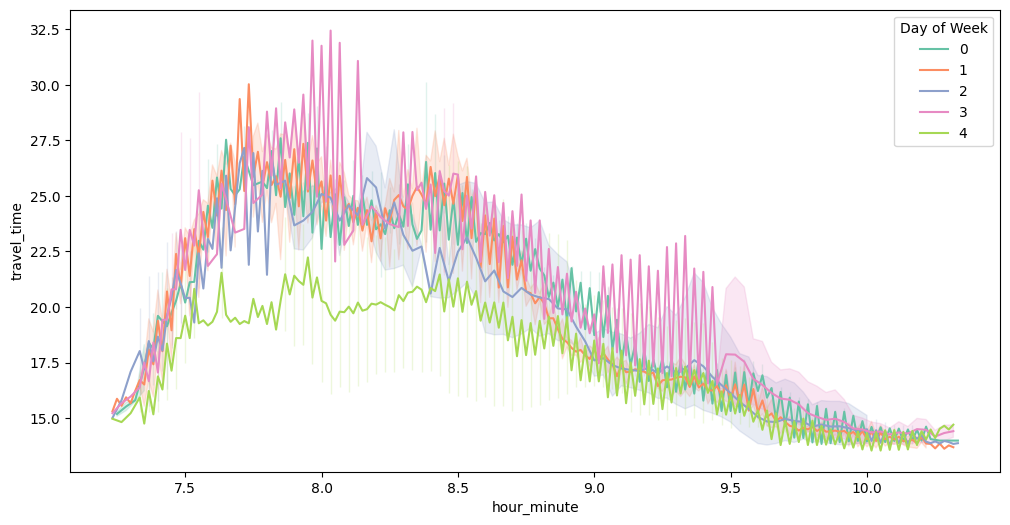

In [8]:
# plot hour_minute vs travel_time
# each day of week has a different color
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric days to day names
#day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#df['day_of_week'] = df['day_of_week'].map(day_mapping)

# Choose a color palette
palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_minute', y='travel_time', hue='day_of_week', data=df, palette=palette)

# Add legend with the days of the week
plt.legend(title='Day of Week')

plt.show()


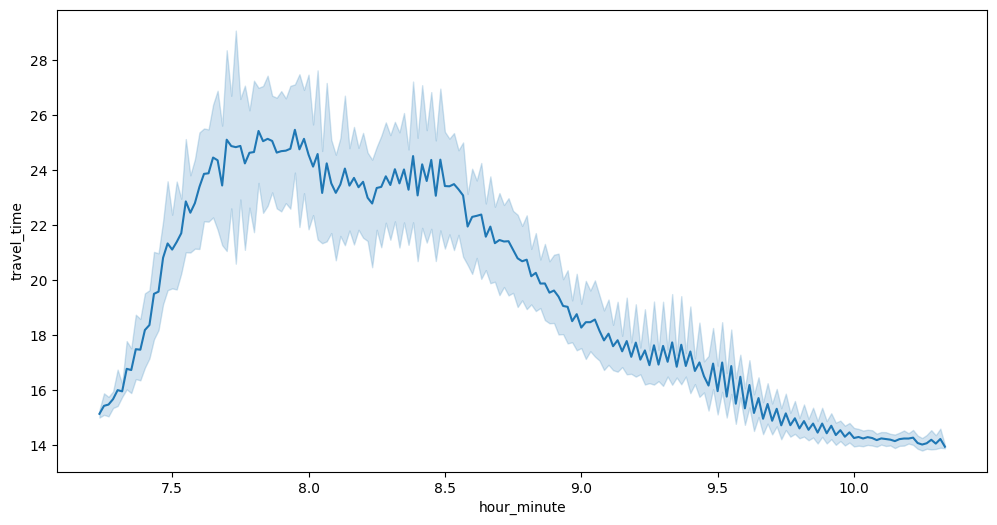

In [9]:
# plot hour_minute vs travel_time
# with Y error
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_minute', y='travel_time', data=df)
#plt.fill_between(df['hour_minute'], df['travel_time'] - 5, df['travel_time'] + 5, alpha=0.2)
plt.show()


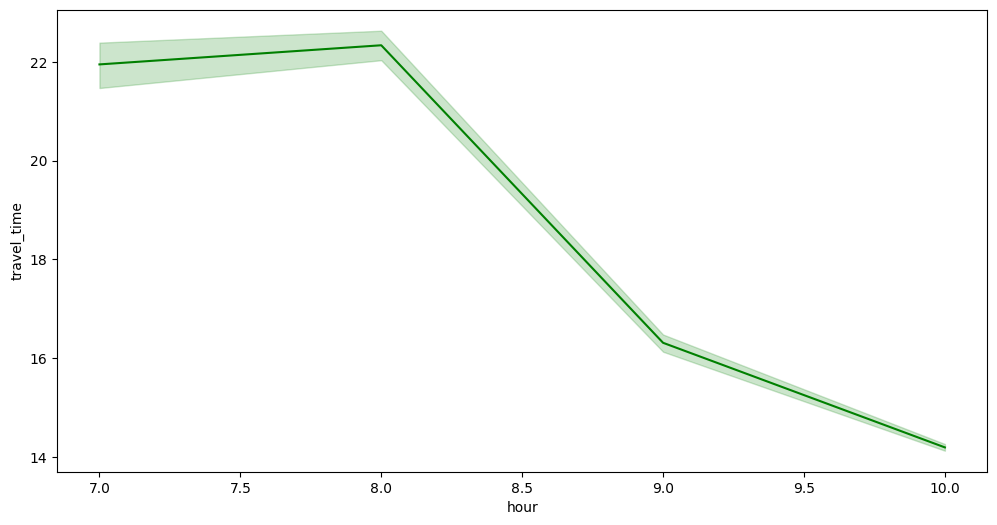

In [10]:
# A graph with green lines that show the average travel time for each hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='travel_time', data=df, color='green')
plt.show()
